# HUMAN LIFE EXPECTANCY ANALYSIS

### Modules

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly # to save the graphs
from sklearn.impute import SimpleImputer
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the dateset

In [61]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Cleaning The Dataframe

#### Observing the details of the dataframe

In [62]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

#### Looking for NULL values in the dataframe

In [63]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#### Replacing the Null/ Empty values by the mean

In [64]:
#df.columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None)

df["Life expectancy "] = imputer.fit_transform( df[["Life expectancy "]])

df["Adult Mortality"] = imputer.fit_transform( df[["Adult Mortality"]])

df["Alcohol"] = imputer.fit_transform( df[["Alcohol"]])

df["Hepatitis B"] = imputer.fit_transform( df[["Hepatitis B"]])

df[" BMI "] = imputer.fit_transform( df[[" BMI "]])

df["Polio"] = imputer.fit_transform( df[["Polio"]])

df["Total expenditure"] = imputer.fit_transform( df[["Total expenditure"]])

df["Diphtheria "] = imputer.fit_transform( df[["Diphtheria "]])

df["GDP"] = imputer.fit_transform( df[["GDP"]])

df["Population"] = imputer.fit_transform( df[["Population"]])

df[" thinness  1-19 years"] = imputer.fit_transform( df[[" thinness  1-19 years"]])

df[" thinness 5-9 years"] = imputer.fit_transform( df[[" thinness 5-9 years"]])

df["Income composition of resources"] = imputer.fit_transform( df[["Income composition of resources"]])

df["Schooling"] = imputer.fit_transform( df[["Schooling"]])

#### Renaming the columns

In [65]:
df.columns
df.rename( columns = {'Country': 'Country', 'Year': 'Year', 'Status': 'Status',
                    'Life expectancy ': 'Life_Expectancy', 'Adult Mortality': 'Adult_Mortality',
                     'infant deaths': 'Infant_Deaths', 'percentage expenditure': 'Percentage_Expenditure',
                    'Alcohol': 'Alcohol', 'Hepatitis B': 'Hepatitis_B', 'Measles ': 'Measles',
                     'under-five deaths ': 'Under_Five_Deaths', 'Total expenditure': 'Total_Expenditure',
                    'Polio': 'Polio', 'Diphtheria ': 'Diphtheria', ' HIV/AIDS': 'HIV/AIDS', 'GDP': 'GDP',
                     'Population': 'Population', ' thinness  1-19 years': 'Thinness_10_To_19',
                     ' thinness 5-9 years': 'Thinness_5_To_9',  ' BMI ': 'BMI', 'Schooling': 'Schooling',
                      'Income composition of resources': 'Income_Composition_Of_Resources'}, inplace=True)

## Questions & Answers

### Question #1: What age group has the highest life expectancy?

In [66]:
#Histogram
fig = px.histogram(df, x="Life_Expectancy", template="seaborn", color_discrete_sequence=['#3D1766'],
                  title='<b>Life Expectancy Distribution')
fig.update_xaxes(tickvals = np.arange(0, 100, 5))
fig.show()

# plotly.offline.plot(fig, filename='Graph - Life Expectancy Distribution.html')

#### Answer: The Life Expectancy is high between the age of 70 to 75.

### Question #2: Compare the life expectancy between Developing and Developed Countries.

In [67]:
''''
# BOX PLOT
fig = px.box(df, x='Status', y='Life_Expectancy', color='Status', points='outliers', template='seaborn',
               title='Life Expectancy between Developing and Developed Countries')
fig.update_layout(height=700, width=900)
fig.update_traces(width=0.2)
fig.show()
'''

# VIOLIN PLOT
fig = px.violin(df, x='Status', y='Life_Expectancy', template='seaborn', color='Status', 
                box=True, title='<b>Life Expectancy between Developing and Developed Countries')
fig.update_traces(width=0.5)
fig.show()

# plotly.offline.plot(fig, filename='Graph - Life Expectancy between Developing and Developed Countries.html')

#### Answer: Developing countries have lower life expectancy and the developed countries have higher life expectancy.

### Question #3: Analyze the country wise life expectancies over the years. 

In [68]:
# Animated Line Graph
fig=px.line(df, x='Year', y='Life_Expectancy', animation_frame='Country', animation_group='Year', 
            color='Country', markers=True, template="seaborn", 
            title='<b> Country wise Life Expectancy over Years')

fig.update_yaxes(range = [30,90])
fig.update_layout(height=700, width=900, showlegend=False)
fig.show()

# plotly.offline.plot(fig, filename='Graph - Country-wise Life Expectancy over Years.html')

#### Answer: The graph above shows the country-wise life expectancy over the years. Since the data for some of the countries are absent, the graph isnt constructed for them.

### Question #4: Analyze the life expectancy over the infant death for the countries.

In [69]:
# SCATTER PLOT
fig = px.scatter(df, x='Life_Expectancy', y='Infant_Deaths', color='Country', 
           size='Year', template='seaborn', opacity=0.6, 
           title = '<b>Life Expectancy over Infant Deaths')
fig.update_layout(width=900, height=700)
fig.show()

# plotly.offline.plot(fig, filename='Graph - Life Expectancy over Infant Deaths.html')

#### Answer: Above graph shows that more infant death low life expectancy. e.g India had 1800 infant death in year 2000 and the life expectancy rate in year 2000 was 62.5 on other hand in 2015 infant death decreases to 910 and life expectancy increases to 68.3. So life expectancy is directly propotional to the death of the infant per year.

## Question #5: Analyze the Life Expectancy over overall GDP and Mean Years of Schooling.

In [70]:
# 3D Scatter Plot 
fig = px.scatter_3d(df, x='Life_Expectancy', y='Schooling', z='GDP', color='Country', opacity=0.6, size='Year', template='seaborn',
                title='<b>GDP vs Mean Years of Schooling over the years')
fig.update_layout(width=900, height=700)
fig.show()

# plotly.offline.plot(fig, filename='Graph - Life Expectanxy vs GDP vs Mean Years of Schooling over the years.html')

#### Answer: From the graph above, countries with the least mean years of schooling have the least GDP and least Life Expectancy. Hence, Life Expectancy and GDP of a nation hugely depends upon the academic qualification of its citizen.

## Question 6: Analyse the Life Expectancy of Countries over Adult Mortality over the years.

In [71]:
# Animated Scatter Plot
fig = px.scatter(df, y='Adult_Mortality', x='Life_Expectancy', animation_frame='Year', 
                 animation_group='Country', template='seaborn', color='Country', size='Life_Expectancy', 
                 title='<b> Life expectancy over Adult Mortality')
fig.update_layout(width=900, height=700)
fig.show()

# plotly.offline.plot(fig, filename='Graph - Life Expectancy over Adult Mortality.html')

#### Answer: The graph above shows the change in Life Expectancy of the countries over Adult Mortality over the years.

## Question #7: How are the data variables(columns) related to each other?

Correlation refers to the degree to which a pair of variables are linearly related.

Variables of X and Y are positively correlated if:
    <br> high values of X go with high values of Y
    <br> low values of X go with low values of Y

Variables X and Y are negatively correlated if:
    <br> high values of X go with low values of Y
    <br> low values of X go with high values of Y

The coefficient always has a value between −1 and 1. 
    <br> -1 means perfect negative linear correlation
    <br> +1 means perfect positive linear correlation
    <br> 0 means no linear dependency between variables.

Formula to calculate correlation:
    <br> r = [Σ(xᵢ - x̄)(yᵢ - ȳ)] / √[ Σ(xᵢ - x̄)².Σ(yᵢ - ȳ)² ]

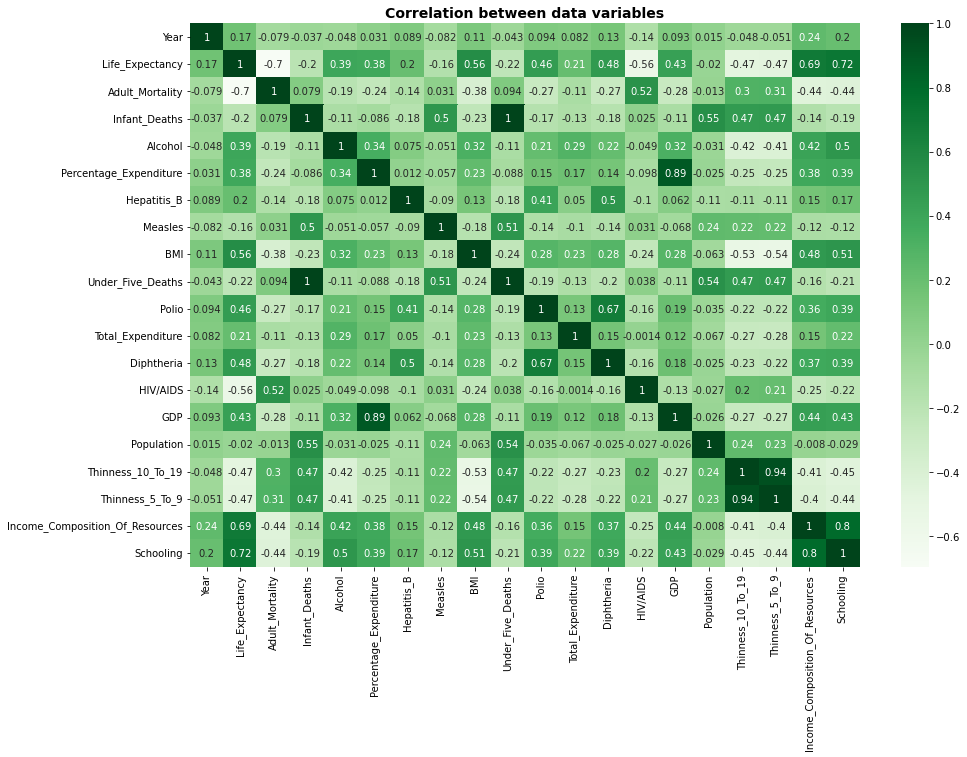

In [72]:
# Heat Map

plt.figure(figsize=(15,10))
plt.title("Correlation between data variables", fontdict={'weight':'bold', 'size':14})
sns.heatmap(df.corr(), annot=True, cmap='Greens')
# plt.savefig("Graph - Linear Correlation between data variables.png")
plt.show()

#### Answer: The graph above shows that, Income Composition of Resources increases with increase in Mean Years of Schooling, while Life Expectancy and Adult Mortality are inversely related.

## Question #8: Visualize the Life Expectancy of the countries via a World Map

In [73]:
# Map graph (using scatter plot)
country_data = px.data.gapminder() # using a builtin dataset from plotly express

fig = px.scatter_geo(country_data, locations='iso_alpha', projection='orthographic', opacity=0.8, color='country',
                    hover_name='country', hover_data=['lifeExp', 'year'], template='seaborn',
                    title='<b>Life Expectancy all over the World')
fig.update_layout(width=900, height=700)
fig.show()

# plotly.offline.plot(fig, filename='Graph - Life Expectancy all over the World.html')

#### Answer: The graph above shows the life expectancy of the countries in the year 2007 CE over a world map.